# <center> Semi-Supervised Clasificator </center>

## MNIST Dataset Exploration

---


In [4]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

from sklearn.cluster               import KMeans
from sklearn.datasets              import load_digits
from sklearn.decomposition         import PCA 
from sklearn.linear_model          import LogisticRegression
from sklearn.preprocessing         import PolynomialFeatures
from sklearn.linear_model          import LinearRegression
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import scale

In [5]:

mnist = pd.read_csv("./mnist_train_small.csv", header=None, sep=';').values

X, Y = mnist[1:, 1:], mnist[1:, 0]

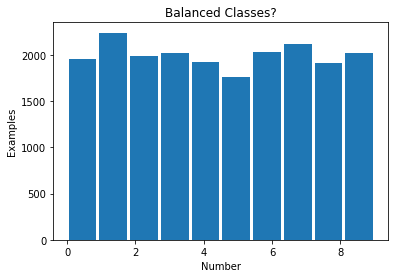

In [6]:
plt.title('Balanced Classes?')
plt.xlabel('Number')
plt.ylabel('Examples')
plt.hist(Y, rwidth=0.9)
plt.show()

In [7]:

Xt = PCA(n_components=0.90).fit_transform(X)

print("PCA: Total classes", X.shape[1], "to", Xt.shape[1], "classes")

PCA: Total classes 784 to 87 classes


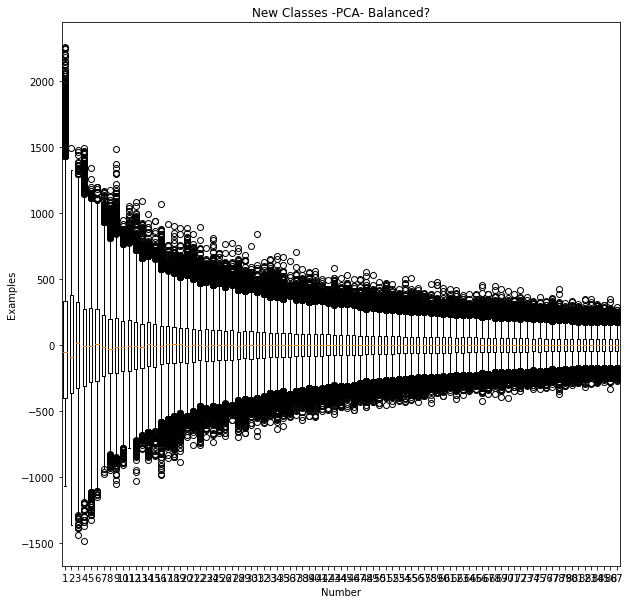

In [8]:
fig = plt.figure(figsize=(10,10))
plt.title('New Classes -PCA- Balanced?')
plt.xlabel('Number')
plt.ylabel('Examples')
plt.boxplot(Xt)
plt.show()

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


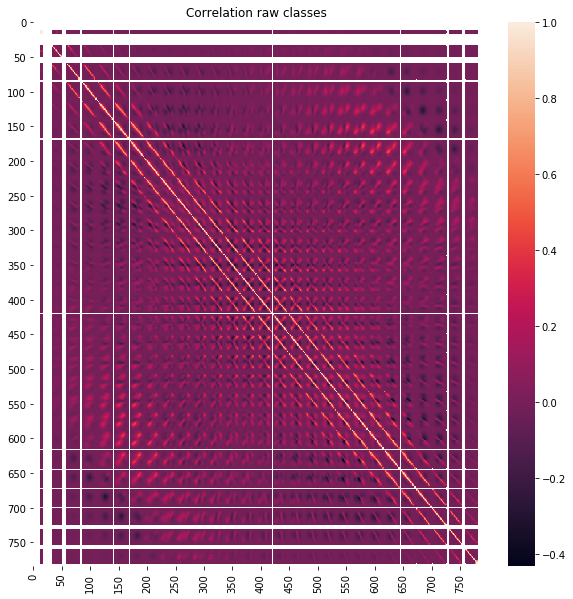

In [9]:

fig = plt.figure(figsize=(10,10))

ax = sb.heatmap(np.corrcoef(X.T))

ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.title('Correlation raw classes')
plt.show()


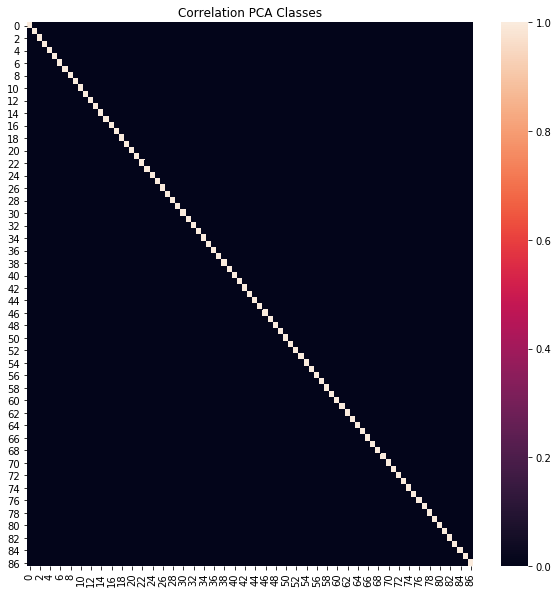

In [10]:
fig = plt.figure(figsize=(10,10))

sb.heatmap(np.corrcoef(Xt.T))

plt.title('Correlation PCA Classes')
plt.show()

In [11]:

wcss = []

# Approuch optimun K

for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km.fit_transform(Xt)
    wcss.append(km.inertia_)

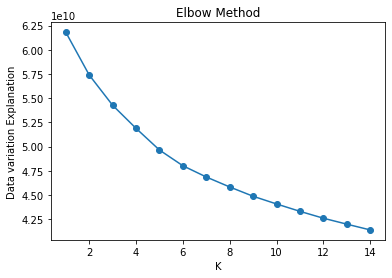

In [12]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Data variation Explanation')
plt.plot(range(1, len(wcss) + 1), wcss, "-o")
plt.show()


   # Well, this happend with heuristics, where is the correct k?
   # fortunately, we know the k is 10



## Semi-supervised   K-means

---

In [17]:

k = 10
acc = []
Iterations = 10


print('Xtshape', Xt.shape, '\n ----------')

for i in range(Iterations):

    print("Complete: ", i / Iterations * 100, "%")

    km = KMeans(n_clusters=k).fit(Xt)
    labls = km.labels_

    # labels to supervised
    m = 100

    # Most common class for group class choice
    
    c_labels = [np.argmax(np.bincount(np.random.choice(
                Y[labls == c].ravel(), m // k))) for c in range(k)]

    # Y predictions
    pY = np.zeros(Y.shape)

    for c in range(k):
        pY[labls == c] = c_labels[c]
    
    # Accuracy
    acc.append((np.sum(pY == Y) - m) / pY.shape[0])

print("-----")
print("Mean Accuracy :", np.mean(acc), 
      "- SEMI-SUP (Kmeans) Train with", 
      m / pY.shape[0] * 100, "% of data.")

Xtshape (20000, 87) 
 ----------
Complete:  0.0 %
Complete:  10.0 %
Complete:  20.0 %
Complete:  30.0 %
Complete:  40.0 %
Complete:  50.0 %
Complete:  60.0 %
Complete:  70.0 %
Complete:  80.0 %
Complete:  90.0 %
-----
Mean Accuracy : 0.5383149999999999 - SEMI-SUP (Kmeans) Train with 0.5 % of data.


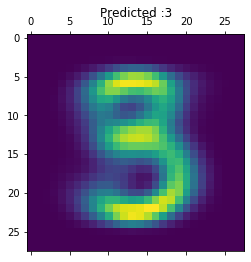

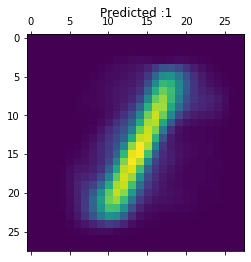

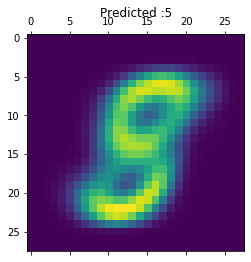

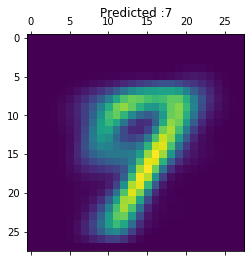

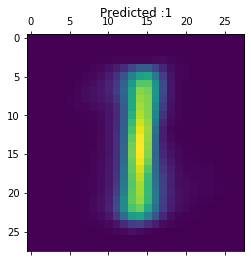

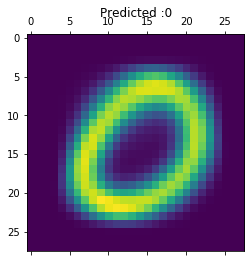

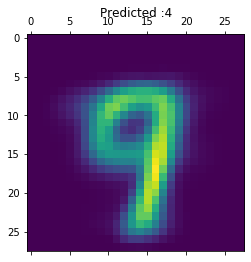

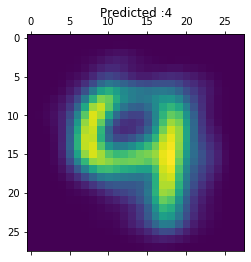

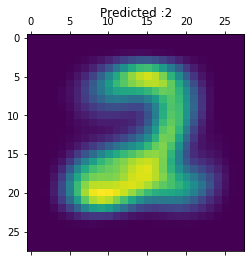

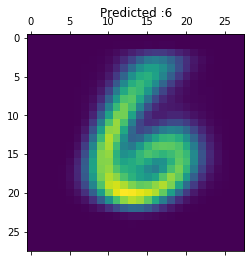

In [18]:

# Prove the model
 
for c in range(k):
    fig, ax = plt.subplots(num=c)
    plt.title("Predicted :" + str(c_labels[c]))
    ax.matshow(np.mean(X[labls == c], axis=0).reshape(28, 28))
    plt.show()

In [18]:

# Logistic Regression Model

Iterations = 10
X_scale = scale(Xt)
acc = []
pY = np.zeros(Y.shape)

for i in range(Iterations):

    print("Completed: ", i / Iterations * 100, "%")

    X_tr, X_te, Y_tr, Y_te = train_test_split(X_scale, Y)
    
    lo = LogisticRegression(multi_class='multinomial', solver="newton-cg").fit(X_tr, Y_tr.ravel())

    acc.append(lo.score(X_te, Y_te))

print("-----")
print("Accuracy media:", np.mean(acc),
      " - SUP (Logistic.Regression) Train with", 
      X_tr.shape[0] / pY.shape[0] * 100, "% of data")

Completed:  0.0 %
Completed:  10.0 %
Completed:  20.0 %
Completed:  30.0 %
Completed:  40.0 %
Completed:  50.0 %
Completed:  60.0 %
Completed:  70.0 %
Completed:  80.0 %
Completed:  90.0 %
-----
Accuracy media: 0.9085000000000001  - SUP (Logistic.Regression) Train with 75.0 % of data


In [22]:

# Polynomial Regression Model

Iterations = 10
X_scale = scale(Xt)
acc = []
pY = np.zeros(Y.shape)
poly = PolynomialFeatures(2)
X_scale = poly.fit_transform(X_scale)

for i in range(Iterations):

    print("Completed: ", i / Iterations * 100, "%")

    X_tr, X_te, Y_tr, Y_te = train_test_split(X_scale, Y)

    lo = LinearRegression().fit(X_tr, Y_tr.ravel())

    acc.append(lo.score(X_te, Y_te))

print("-----")
print("Accuracy media:", np.mean(acc),
      " - SUP (Polynomial.Regression) Train with", 
      X_tr.shape[0] / pY.shape[0] * 100, "% of data")

Completed:  0.0 %
Completed:  10.0 %
Completed:  20.0 %
Completed:  30.0 %
Completed:  40.0 %
Completed:  50.0 %
Completed:  60.0 %
Completed:  70.0 %
Completed:  80.0 %
Completed:  90.0 %
-----
Accuracy media: 0.8392853522446451  - SUP (Polynomial.Regression) Train with 75.0 % of data


In [23]:

# Linear Regression Model

Iterations = 10
X_scale = scale(Xt)
acc = []
pY = np.zeros(Y.shape)

for i in range(Iterations):

    print("Completed: ", i / Iterations * 100, "%")

    X_tr, X_te, Y_tr, Y_te = train_test_split(X_scale, Y)
    
    lo = LinearRegression().fit(X_tr, Y_tr.ravel())

    acc.append(lo.score(X_te, Y_te))

print("-----")
print("Accuracy media:", np.mean(acc),
      " - SUP (Linear.Regression) Train with", 
      X_tr.shape[0] / pY.shape[0] * 100, "% of data")

Completed:  0.0 %
Completed:  10.0 %
Completed:  20.0 %
Completed:  30.0 %
Completed:  40.0 %
Completed:  50.0 %
Completed:  60.0 %
Completed:  70.0 %
Completed:  80.0 %
Completed:  90.0 %
-----
Accuracy media: 0.5702735620417494  - SUP (Linear.Regression) Train with 75.0 % of data


In [24]:

 # KNN Model

Iterations = 10
X_scale = scale(Xt)
acc = []
pY = np.zeros(Y.shape)
k = 10

for i in range(Iterations):

    print("Completed: ", i / Iterations * 100, "%")

    X_tr, X_te, Y_tr, Y_te = train_test_split(X_scale, Y)
    
    lo = KNeighborsClassifier(n_neighbors=k).fit(X_tr, Y_tr)
    
    acc.append(lo.score(X_te, Y_te))

print("-----")
print("Accuracy media:", np.mean(acc),
      " - SUP (KNN) Train with", 
      X_tr.shape[0] / pY.shape[0] * 100, "% of data")

Completed:  0.0 %
Completed:  10.0 %
Completed:  20.0 %
Completed:  30.0 %
Completed:  40.0 %
Completed:  50.0 %
Completed:  60.0 %
Completed:  70.0 %
Completed:  80.0 %
Completed:  90.0 %
-----
Accuracy media: 0.9019  - SUP (KNN) Train with 75.0 % of data
